<a href="https://colab.research.google.com/github/ishankarve/Assignment-Advanced-Regression/blob/main/Assignment%20Advanced%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Advanced Linear Regression Model for Prediction of Investment Worthy Properties

###### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market

#### The company wants to know:
###### 1: Which variables are significant in predicting the price of a house?
###### 2: How well those variables describe the price of a house?

### **Import Libraries**

In [952]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [953]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [954]:
# prevent result truncation
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300

### **Import Data**

In [955]:
#import data from gihub link
#raw_df=pd.read_csv("https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv")
raw_df=pd.read_csv("train.csv")

In [956]:
raw_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **Data Dictionary**

 + MSSubClass: Identifies the type of dwelling involved in the sale.    

		20    1-STORY 1946 & NEWER ALL STYLES
		30    1-STORY 1945 & OLDER
		40    1-STORY W/FINISHED ATTIC ALL AGES
		45    1-1/2 STORY + UNFINISHED ALL AGES
		50    1-1/2 STORY FINISHED ALL AGES
		60    2-STORY 1946 & NEWER
		70    2-STORY 1945 & OLDER
		75    2-1/2 STORY ALL AGES
		80    SPLIT OR MULTI-LEVEL
		85    SPLIT FOYER
		90    DUPLEX + ALL STYLES AND AGES
		120    1-STORY PUD (Planned Unit Development) + 1946 & NEWER
		150    1-1/2 STORY PUD + ALL AGES
		160    2-STORY PUD + 1946 & NEWER
		180    PUD + MULTILEVEL + INCL SPLIT LEV/FOYER
		190    2 FAMILY CONVERSION + ALL STYLES AND AGES

 + MSZoning: Identifies the general zoning classification of the sale.
        
		A    Agriculture
		C    Commercial
		FV    Floating Village Residential
		I    Industrial
		RH    Residential High Density
		RL    Residential Low Density
		RP    Residential Low Density Park 
		RM    Residential Medium Density
    
- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet

+ Street: Type of road access to property

		Grvl    Gravel    
		Pave    Paved
		    

+ Alley: Type of alley access to property

		Grvl    Gravel
		Pave    Paved
		NA     No alley access
        
+ LotShape: General shape of property

		Reg    Regular    
		IR1    Slightly irregular
		IR2    Moderately Irregular
		IR3    Irregular
		
+ LandContour: Flatness of the property

		Lvl    Near Flat/Level    
		Bnk    Banked + Quick and significant rise from street grade to building
		HLS    Hillside + Significant slope from side to side
		Low    Depression
        
+ Utilities: Type of utilities available
        
		AllPub    All public Utilities (E,G,W,& S)    
		NoSewr    Electricity, Gas, and Water (Septic Tank)
		NoSeWa    Electricity and Gas Only
		ELO    Electricity only    
    
+ LotConfig: Lot configuration

		Inside    Inside lot
		Corner    Corner lot
		CulDSac    Cul-de-sac
		FR2    Frontage on 2 sides of property
		FR3    Frontage on 3 sides of property
    
+ LandSlope: Slope of property
        
		Gtl    Gentle slope
		Mod    Moderate Slope    
		Sev    Severe Slope
    
+ Neighborhood: Physical locations within Ames city limits

		Blmngtn    Bloomington Heights
		Blueste    Bluestem
		BrDale    Briardale
		BrkSide    Brookside
		ClearCr    Clear Creek
		CollgCr    College Creek
		Crawfor    Crawford
		Edwards    Edwards
		Gilbert    Gilbert
		IDOTRR    Iowa DOT and Rail Road
		MeadowV    Meadow Village
		Mitchel    Mitchell
		Names    North Ames
		NoRidge    Northridge
		NPkVill    Northpark Villa
		NridgHt    Northridge Heights
		NWAmes    Northwest Ames
		OldTown    Old Town
		SWISU    South & West of Iowa State University
		Sawyer    Sawyer
		SawyerW    Sawyer West
		Somerst    Somerset
		StoneBr    Stone Brook
		Timber    Timberland
		Veenker    Veenker
            
+ Condition1: Proximity to various conditions
    
		Artery    Adjacent to arterial street
		Feedr    Adjacent to feeder street    
		Norm    Normal    
		RRNn    Within 200' of North-South Railroad
		RRAn    Adjacent to North-South Railroad
		PosN    Near positive off-site feature--park, greenbelt, etc.
		PosA    Adjacent to postive off-site feature
		RRNe    Within 200' of East-West Railroad
		RRAe    Adjacent to East-West Railroad
    
+ Condition2: Proximity to various conditions (if more than one is present)
        
		Artery    Adjacent to arterial street
		Feedr    Adjacent to feeder street    
		Norm    Normal    
		RRNn    Within 200' of North-South Railroad
		RRAn    Adjacent to North-South Railroad
		PosN    Near positive off-site feature--park, greenbelt, etc.
		PosA    Adjacent to postive off-site feature
		RRNe    Within 200' of East-West Railroad
		RRAe    Adjacent to East-West Railroad
    
+ BldgType: Type of dwelling
        
		1Fam    Single-family Detached    
		2FmCon    Two-family Conversion; originally built as one-family dwelling
		Duplx    Duplex
		TwnhsE    Townhouse End Unit
		TwnhsI    Townhouse Inside Unit
    
+ HouseStyle: Style of dwelling
    
		1Story    One story
		1.5Fin    One and one-half story: 2nd level finished
		1.5Unf    One and one-half story: 2nd level unfinished
		2Story    Two story
		2.5Fin    Two and one-half story: 2nd level finished
		2.5Unf    Two and one-half story: 2nd level unfinished
		SFoyer    Split Foyer
		SLvl    Split Level
    
+ OverallQual: Rates the overall material and finish of the house

		10    Very Excellent
		9    Excellent
		8    Very Good
		7    Good
		6    Above Average
		5    Average
		4    Below Average
		3    Fair
		2    Poor
		1    Very Poor
    
+ OverallCond: Rates the overall condition of the house

		10    Very Excellent
		9    Excellent
		8    Very Good
		7    Good
		6    Above Average    
		5    Average
		4    Below Average    
		3    Fair
		2    Poor
		1    Very Poor
        
- YearBuilt: Original construction date

- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

+ RoofStyle: Type of roof

		Flat    Flat
		Gable    Gable
		Gambrel    Gabrel (Barn)
		Hip    Hip
		Mansard    Mansard
		Shed    Shed
        
+ RoofMatl: Roof material

		ClyTile    Clay or Tile
		CompShg    Standard (Composite) Shingle
		Membran    Membrane
		Metal    Metal
		Roll    Roll
		Tar&Grv    Gravel & Tar
		WdShake    Wood Shakes
		WdShngl    Wood Shingles
        
+ Exterior1st: Exterior covering on house

		AsbShng    Asbestos Shingles
		AsphShn    Asphalt Shingles
		BrkComm    Brick Common
		BrkFace    Brick Face
		CBlock    Cinder Block
		CemntBd    Cement Board
		HdBoard    Hard Board
		ImStucc    Imitation Stucco
		MetalSd    Metal Siding
		Other    Other
		Plywood    Plywood
		PreCast    PreCast    
		Stone    Stone
		Stucco    Stucco
		VinylSd    Vinyl Siding
		Wd Sdng    Wood Siding
		WdShing    Wood Shingles
    
+ Exterior2nd: Exterior covering on house (if more than one material)

		AsbShng    Asbestos Shingles
		AsphShn    Asphalt Shingles
		BrkComm    Brick Common
		BrkFace    Brick Face
		CBlock    Cinder Block
		CemntBd    Cement Board
		HdBoard    Hard Board
		ImStucc    Imitation Stucco
		MetalSd    Metal Siding
		Other    Other
		Plywood    Plywood
		PreCast    PreCast
		Stone    Stone
		Stucco    Stucco
		VinylSd    Vinyl Siding
		Wd Sdng    Wood Siding
		WdShing    Wood Shingles
    
+ MasVnrType: Masonry veneer type

		BrkCmn    Brick Common
		BrkFace    Brick Face
		CBlock    Cinder Block
		None    None
		Stone    Stone
    
- MasVnrArea: Masonry veneer area in square feet

+ ExterQual: Evaluates the quality of the material on the exterior 
        
		Ex    Excellent
		Gd    Good
		TA    Average/Typical
		Fa    Fair
		Po    Poor
        
+ ExterCond: Evaluates the present condition of the material on the exterior
        
		Ex    Excellent
		Gd    Good
		TA    Average/Typical
		Fa    Fair
		Po    Poor
        
+ Foundation: Type of foundation
        
		BrkTil    Brick & Tile
		CBlock    Cinder Block
		PConc    Poured Contrete    
		Slab    Slab
		Stone    Stone
		Wood    Wood
        
+ BsmtQual: Evaluates the height of the basement

		Ex    Excellent (100+ inches)    
		Gd    Good (90-99 inches)
		TA    Typical (80-89 inches)
		Fa    Fair (70-79 inches)
		Po    Poor (<70 inches
		NA    No Basement
        
+ BsmtCond: Evaluates the general condition of the basement

		Ex    Excellent
		Gd    Good
		TA    Typical + slight dampness allowed
		Fa    Fair + dampness or some cracking or settling
		Po    Poor + Severe cracking, settling, or wetness
		NA    No Basement
    
+ BsmtExposure: Refers to walkout or garden level walls

		Gd    Good Exposure
		Av    Average Exposure (split levels or foyers typically score average or above)    
		Mn    Mimimum Exposure
		No    No Exposure
		NA    No Basement
    
+ BsmtFinType1: Rating of basement finished area

		GLQ    Good Living Quarters
		ALQ    Average Living Quarters
		BLQ    Below Average Living Quarters    
		Rec    Average Rec Room
		LwQ    Low Quality
		Unf    Unfinshed
		NA    No Basement
        
- BsmtFinSF1: Type 1 finished square feet

+ BsmtFinType2: Rating of basement finished area (if multiple types)

		GLQ    Good Living Quarters
		ALQ    Average Living Quarters
		BLQ    Below Average Living Quarters    
		Rec    Average Rec Room
		LwQ    Low Quality
		Unf    Unfinshed
		NA    No Basement

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

+ Heating: Type of heating
        
		Floor    Floor Furnace
		GasA    Gas forced warm air furnace
		GasW    Gas hot water or steam heat
		Grav    Gravity furnace    
		OthW    Hot water or steam heat other than gas
		Wall    Wall furnace
        
+ HeatingQC: Heating quality and condition

		Ex    Excellent
		Gd    Good
		TA    Average/Typical
		Fa    Fair
		Po    Poor
        
+ CentralAir: Central air conditioning

		N    No
		Y    Yes
        
+ Electrical: Electrical system

		SBrkr    Standard Circuit Breakers & Romex
		FuseA    Fuse Box over 60 AMP and all Romex wiring (Average)    
		FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
		FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
		Mix    Mixed
        
-  1stFlrSF: First Floor square feet
 
-  2ndFlrSF: Second floor square feet

-  LowQualFinSF: Low quality finished square feet (all floors)

-  GrLivArea: Above grade (ground) living area square feet

-  BsmtFullBath: Basement full bathrooms

-  BsmtHalfBath: Basement half bathrooms

-  FullBath: Full bathrooms above grade

-  HalfBath: Half baths above grade

-  Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

-  Kitchen: Kitchens above grade

+  KitchenQual: Kitchen quality

		Ex    Excellent
		Gd    Good
		TA    Typical/Average
		Fa    Fair
		Po    Poor
		    
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

+ Functional: Home functionality (Assume typical unless deductions are warranted)

		Typ    Typical Functionality
		Min1    Minor Deductions 1
		Min2    Minor Deductions 2
		Mod    Moderate Deductions
		Maj1    Major Deductions 1
		Maj2    Major Deductions 2
		Sev    Severely Damaged
		Sal    Salvage only
        
- Fireplaces: Number of fireplaces

+ FireplaceQu: Fireplace quality

		Ex    Excellent + Exceptional Masonry Fireplace
		Gd    Good + Masonry Fireplace in main level
		TA    Average + Prefabricated Fireplace in main living area or Masonry Fireplace in basement
		Fa    Fair + Prefabricated Fireplace in basement
		Po    Poor + Ben Franklin Stove
		NA    No Fireplace
        
+ GarageType: Garage location
        
		2Types    More than one type of garage
		Attchd    Attached to home
		Basment    Basement Garage
		BuiltIn    Built-In (Garage part of house + typically has room above garage)
		CarPort    Car Port
		Detchd    Detached from home
		NA    No Garage
        
+ GarageYrBlt: Year garage was built
        
+ GarageFinish: Interior finish of the garage

		Fin    Finished
		RFn    Rough Finished    
		Unf    Unfinished
		NA    No Garage
        
+ GarageCars: Size of garage in car capacity

+ GarageArea: Size of garage in square feet

+ GarageQual: Garage quality

		Ex    Excellent
		Gd    Good
		TA    Typical/Average
		Fa    Fair
		Po    Poor
		NA    No Garage
        
+ GarageCond: Garage condition

		Ex    Excellent
		Gd    Good
		TA    Typical/Average
		Fa    Fair
		Po    Poor
		NA    No Garage
        
+ PavedDrive: Paved driveway

		Y    Paved 
		P    Partial Pavement
		N    Dirt/Gravel
        
- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

+ PoolQC: Pool quality
        
		Ex    Excellent
		Gd    Good
		TA    Average/Typical
		Fa    Fair
		NA    No Pool
        
+ Fence: Fence quality
        
		GdPrv    Good Privacy
		MnPrv    Minimum Privacy
		GdWo    Good Wood
		MnWw    Minimum Wood/Wire
		NA    No Fence
    
+ MiscFeature: Miscellaneous feature not covered in other categories
        
		Elev    Elevator
		Gar2    2nd Garage (if not described in garage section)
		Othr    Other
		Shed    Shed (over 100 SF)
		TenC    Tennis Court
		NA    None
        
- MiscVal: $Value of miscellaneous feature

- MoSold: Month Sold (MM)

- YrSold: Year Sold (YYYY)

+ SaleType: Type of sale
        
		WD     Warranty Deed + Conventional
		CWD    Warranty Deed + Cash
		VWD    Warranty Deed + VA Loan
		New    Home just constructed and sold
		COD    Court Officer Deed/Estate
		Con    Contract 15% Down payment regular terms
		ConLw    Contract Low Down payment and low interest
		ConLI    Contract Low Interest
		ConLD    Contract Low Down
		Oth    Other
        
+ SaleCondition: Condition of sale

		Normal    Normal Sale
		Abnorml    Abnormal Sale +  trade, foreclosure, short sale
		AdjLand    Adjoining Land Purchase
		Alloca    Allocation + two linked properties with separate deeds, typically condo with a garage unit    
		Family    Sale between family members
		Partial    Home was not completed when last assessed (associated with New Homes)

### **Undertake sanity checks on data**

In [957]:
# get shape of the dataframe
raw_df.shape

(1460, 81)

In [958]:
# check column dtypes
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [959]:
# check data description
raw_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [960]:
# get list of unique variables per column
raw_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [961]:
# check for object columns having null values
raw_df.select_dtypes(include='object').isnull().sum()[raw_df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [962]:
# check for int64 columns having null values
raw_df.select_dtypes(include = 'int64').isnull().sum()[raw_df.select_dtypes(include='int64').isnull().sum()>0]

Series([], dtype: int64)

In [963]:
# check for int64 columns having null values
raw_df.select_dtypes(include = 'float64').isnull().sum()[raw_df.select_dtypes(include='float64').isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

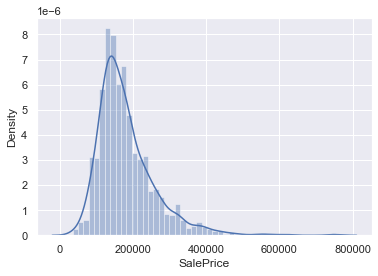

In [964]:
# check distribution of columns having null values
sns.distplot(raw_df['SalePrice'])
plt.show()

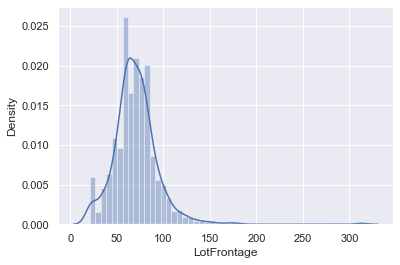

In [965]:
# check distribution of columns having null values
sns.distplot(raw_df['LotFrontage'])
plt.show()

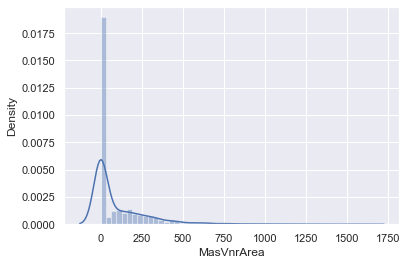

In [966]:
# check distribution of columns having null values
sns.distplot(raw_df['MasVnrArea'])
plt.show()

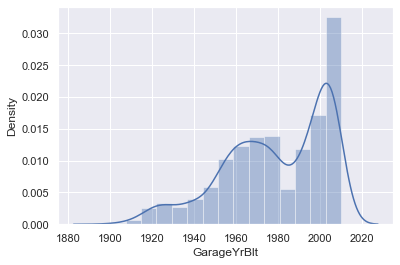

In [967]:
# check distribution of columns having null values
sns.distplot(raw_df['GarageYrBlt'])
plt.show()

In [968]:
# checking value count for MasVnrArea
raw_df['MasVnrArea'].value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

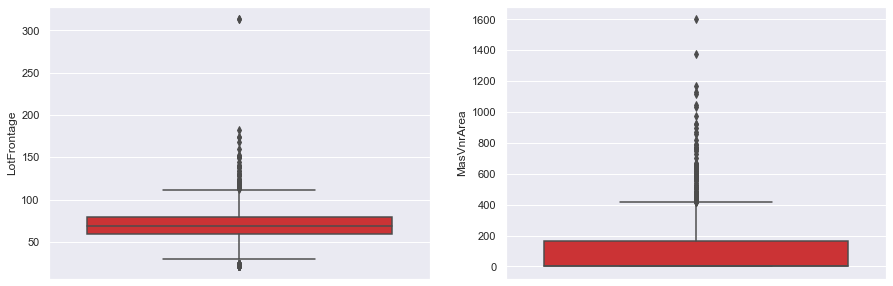

In [969]:
# Check the outliers in both the columns
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = 'LotFrontage', palette='Set1', data = raw_df)
plt.subplot(1,2,2)
sns.boxplot(y = 'MasVnrArea', palette='Set1', data = raw_df)
plt.show()

In [970]:
raw_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [971]:
raw_df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [972]:
raw_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### **Impute Null Values in Data**

In [973]:
# since LotFrontage has a well defined median, imputing na values by median
raw_df["LotFrontage"].fillna(raw_df["LotFrontage"].median(), inplace=True)

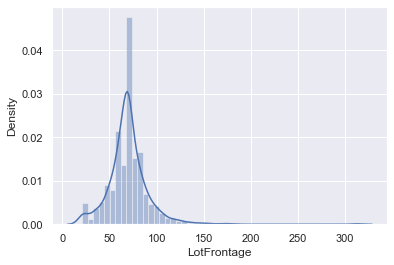

In [974]:
# check distribution of columns post imputing values
sns.distplot(raw_df['LotFrontage'])
plt.show()

In [975]:
# since MasVnrArea has most of the values zero , imputing na values by zero
raw_df["MasVnrArea"] = raw_df["MasVnrArea"].fillna(0)

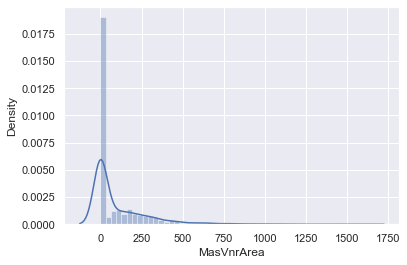

In [976]:
# check distribution of columns post imputing values
sns.distplot(raw_df['MasVnrArea'])
plt.show()

In [977]:
# Null in GarageYrBlt indicates no garage
# we have two options, either drop the row or impute it
# for the moment we will impute it with zero
raw_df["GarageYrBlt"] = raw_df["GarageYrBlt"].fillna(0)

In [978]:
# NA values in column Alley indicate No alley access, imputing with "None"
raw_df["MasVnrType"] = raw_df["MasVnrType"].fillna("None")

In [979]:
# NA values in column Alley indicate No alley, imputing with "None"
raw_df["Alley"] = raw_df["Alley"].fillna("None")

In [980]:
# NA values in column FireplaceQu indicate No fireplace, imputing with "None"
raw_df["FireplaceQu"] = raw_df["FireplaceQu"].fillna("None")

In [981]:
# NA values in column PoolQC indicate No pool, imputing with "None"
raw_df["PoolQC"] = raw_df["PoolQC"].fillna("None")

In [982]:
# NA values in column Fence indicate No fence, imputing with "None"
raw_df["Fence"] = raw_df["Fence"].fillna("None")

In [983]:
# NA values in column MiscFeature indicate No additional feature, imputing with "None"
raw_df["MiscFeature"] = raw_df["MiscFeature"].fillna("None")

In [984]:
# NA values in column BsmtQual indicate No basement, imputing with "None"
raw_df["BsmtQual"] = raw_df["BsmtQual"].fillna("None")

In [985]:
# NA values in column BsmtCond indicate No basement, imputing with "None"
raw_df["BsmtCond"] = raw_df["BsmtCond"].fillna("None")

In [986]:
# NA values in column BsmtExposure indicate No basement, imputing with "None"
raw_df["BsmtExposure"] = raw_df["BsmtExposure"].fillna("None")

In [987]:
# NA values in column BsmtFinType1 indicate No basement, imputing with "None"
raw_df["BsmtFinType1"] = raw_df["BsmtFinType1"].fillna("None")

In [988]:
# NA values in column BsmtFinType2 indicate No basement, imputing with "None"
raw_df["BsmtFinType2"] = raw_df["BsmtFinType2"].fillna("None")

In [989]:
# NA values in column GarageType indicate No garage, imputing with "None"
raw_df["GarageType"] = raw_df["GarageType"].fillna("None")

In [990]:
# NA values in column GarageFinish indicate No garage, imputing with "None"
raw_df["GarageFinish"] = raw_df["GarageFinish"].fillna("None")

In [991]:
# NA values in column GarageQual indicate No garage, imputing with "None"
raw_df["GarageQual"] = raw_df["GarageQual"].fillna("None")

In [992]:
# NA values in column GarageCond indicate No garage, imputing with "None"
raw_df["GarageCond"] = raw_df["GarageCond"].fillna("None")

In [993]:
# SBrkr is the most common value in column Electrical, imputing with "SBrkr"
raw_df["Electrical"] = raw_df["Electrical"].fillna("SBrkr")

In [994]:
# it appears that we have successfully imputed all null values
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [995]:
# since ID is a redundant column, dropping it
raw_df.drop(['Id'],axis = 1, inplace=True)

### **Undertake EDA**

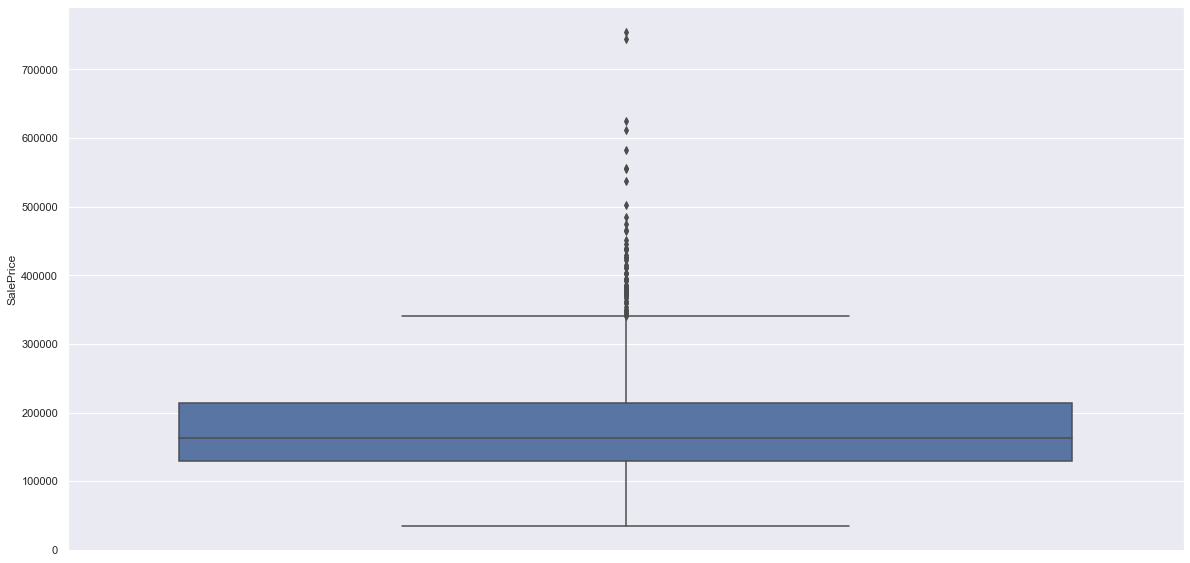

In [996]:
#check distribution of saleprice
plt.figure(figsize=(20, 10))
sns.boxplot(y = 'SalePrice', data = raw_df)
plt.xticks(rotation='vertical')
plt.show()

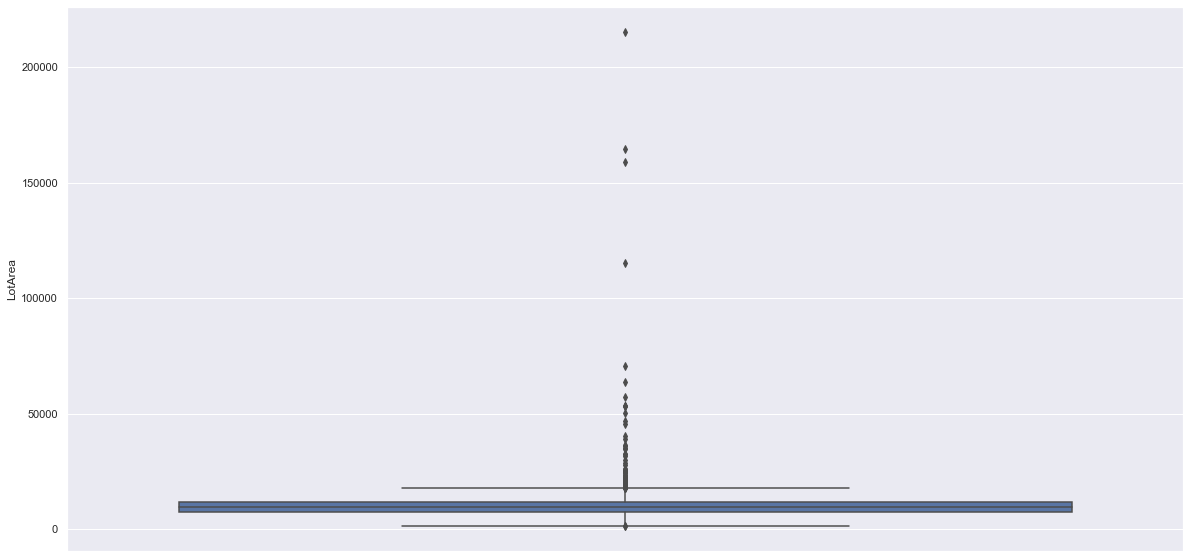

In [997]:
#check distribution of Lot Area
plt.figure(figsize=(20, 10))
sns.boxplot(y = 'LotArea', data = raw_df)
plt.xticks(rotation='vertical')
plt.show()

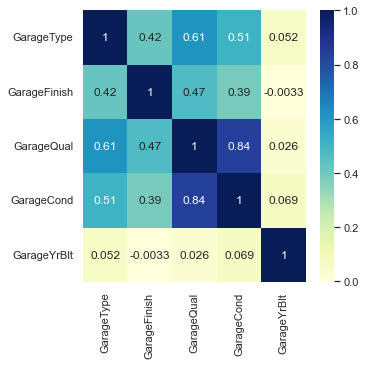

In [998]:
# while undertaking data sanity checks it was seen that
# columns GarageType, GarageFinish, GarageQual, GarageCond,GarageYrBlt
# had 81 values missing which is correlated to garage being absent
# hence values being none or NA
# checking for correlation between them.
# however since there are categorical variables, we will use
# pd.factorise method to get  numeric representation

garage_vars=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt']
garage_df=raw_df[garage_vars]
plt.figure(figsize = (5, 5))
sns.heatmap(garage_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), annot = True, cmap="YlGnBu")
plt.show()



In [999]:
# check correlation as a table
garage_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt
GarageType,1.000000,0.420871,0.613010,0.509335,0.051741
GarageFinish,0.420871,1.000000,0.469993,0.387241,-0.003260
GarageQual,0.613010,0.469993,1.000000,0.838396,0.025522
GarageCond,0.509335,0.387241,0.838396,1.000000,0.069253
GarageYrBlt,0.051741,-0.003260,0.025522,0.069253,1.000000


In [1000]:
(raw_df['GarageCond'].ne(raw_df['GarageQual'])).value_counts()

False    1401
True       59
dtype: int64

In [1001]:
# the above shows a high degree of data correlation (96%). 
# one of the column can be dropped

In [1002]:
# get list of numerical columns
cols = raw_df.select_dtypes(include=['int64','float64']).columns.tolist()

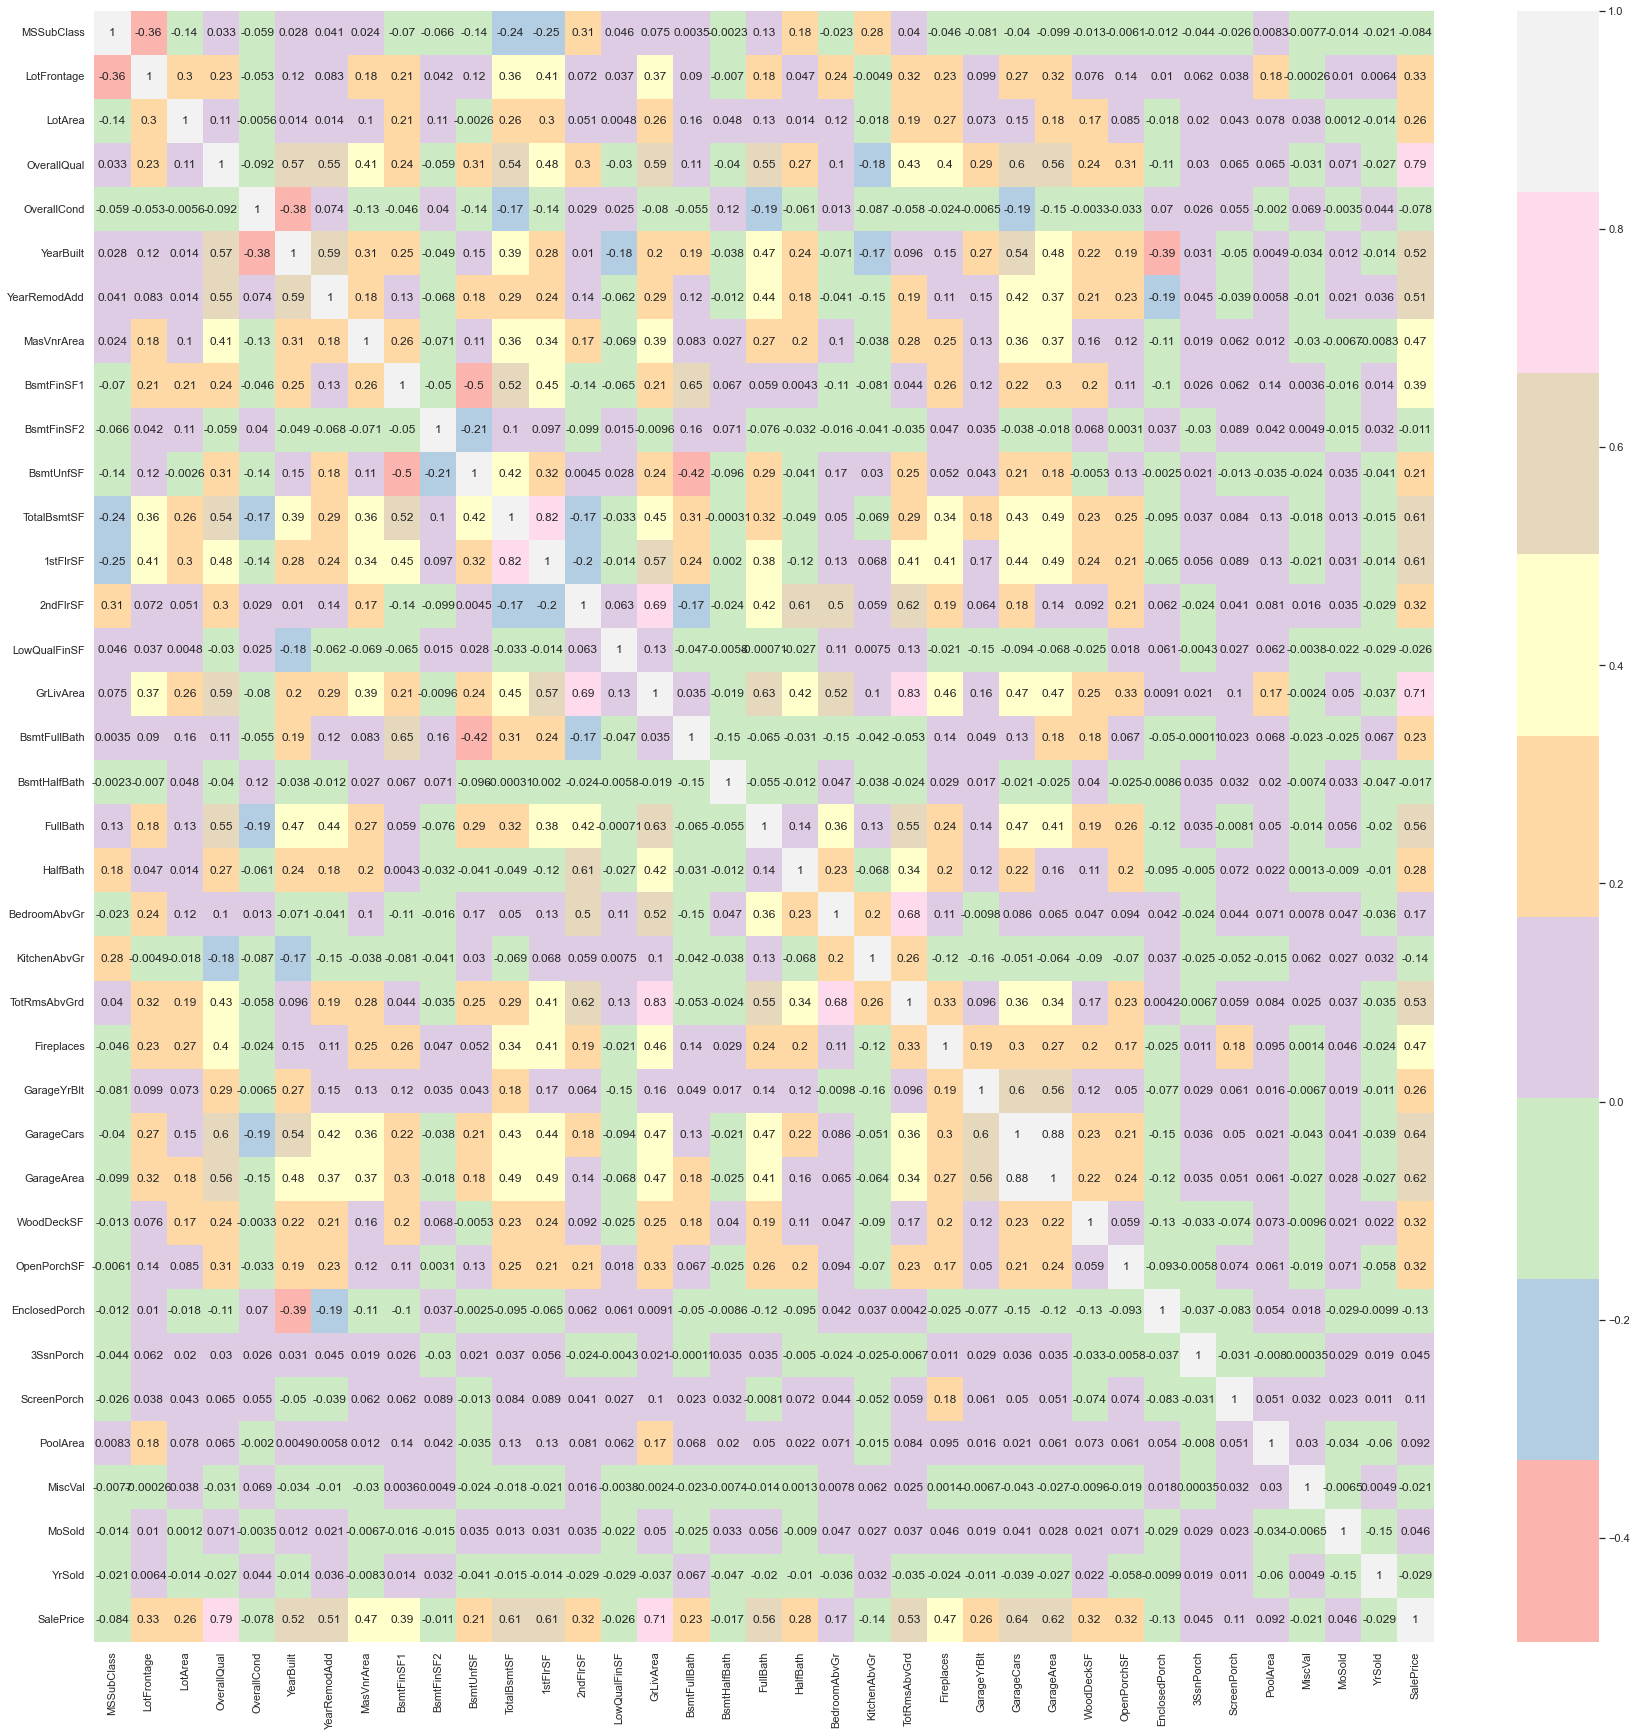

In [1003]:
garage_df=raw_df[cols]
plt.figure(figsize = (30, 30))
sns.heatmap(garage_df.corr(method='pearson', min_periods=1), annot = True, cmap="Pastel1")
plt.show()

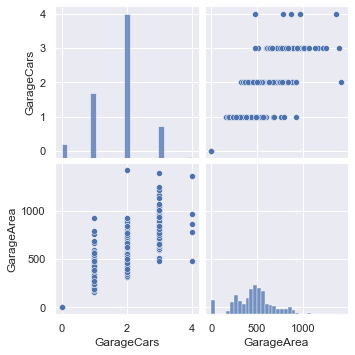

In [1004]:
# validate columns using pair plots of select columns
sns.pairplot(raw_df[['GarageCars','GarageArea']], markers=["o", "s"])
plt.show()

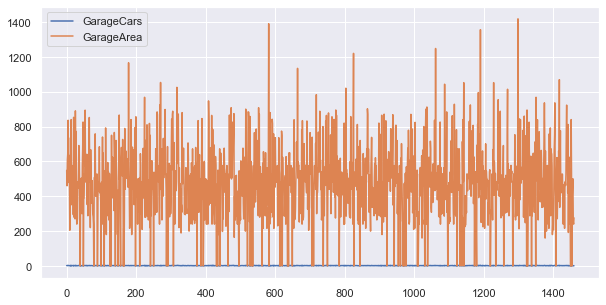

In [1005]:
# draw plot of variables to compare
raw_df.plot(y=['GarageCars','GarageArea'], figsize=(10,5), grid=True)
plt.show()

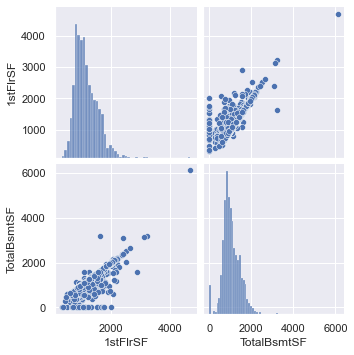

In [1006]:
# validate columns using pair plots of select columns
sns.pairplot(raw_df[['1stFlrSF','TotalBsmtSF']], markers=["o", "s"])
plt.show()

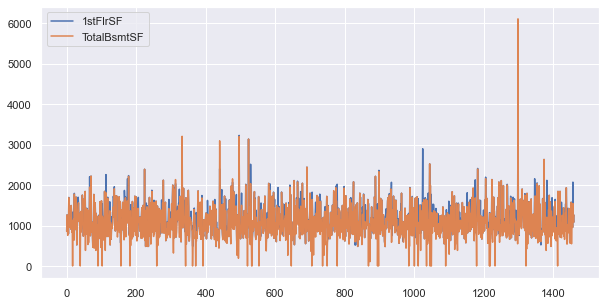

In [1007]:
# draw plot of variables to compare
raw_df.plot(y=['1stFlrSF','TotalBsmtSF'], figsize=(10,5), grid=True)
plt.show()

In [1008]:
# the above shows a high degree of data correlation between 
# GarageCars and GarageArea. 
# one of the column can be dropped

In [1009]:
raw_df.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [1010]:
# Checking the numeric columns with a pairplot 
# Caveat: not all numeric quantities are linear, some are categorical
# therefore, selecting only the linear quantities
cols = ['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'SalePrice']
sns.set()
#sns.pairplot(raw_df[cols])
#plt.show()

In [1011]:
# Checking the numeric columns with a pairplot 
# Caveat: not all numeric quantities are linear, some are categorical
# therefore, selecting only the linear quantities
cols = ['BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']
sns.set()
#sns.pairplot(raw_df[cols])
#plt.show()

### **Undertake Data Cleaning**

In [1012]:
# remove outliers using sale price as the base
# using the IQR method
Q1 = raw_df["SalePrice"].quantile(0.25)
Q3 = raw_df["SalePrice"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
#remove outliers using this method
raw_df = raw_df[~((raw_df["SalePrice"] < (Q1 - 1.5 * IQR)) |(raw_df["SalePrice"] > (Q3 + 1.5 * IQR)))]

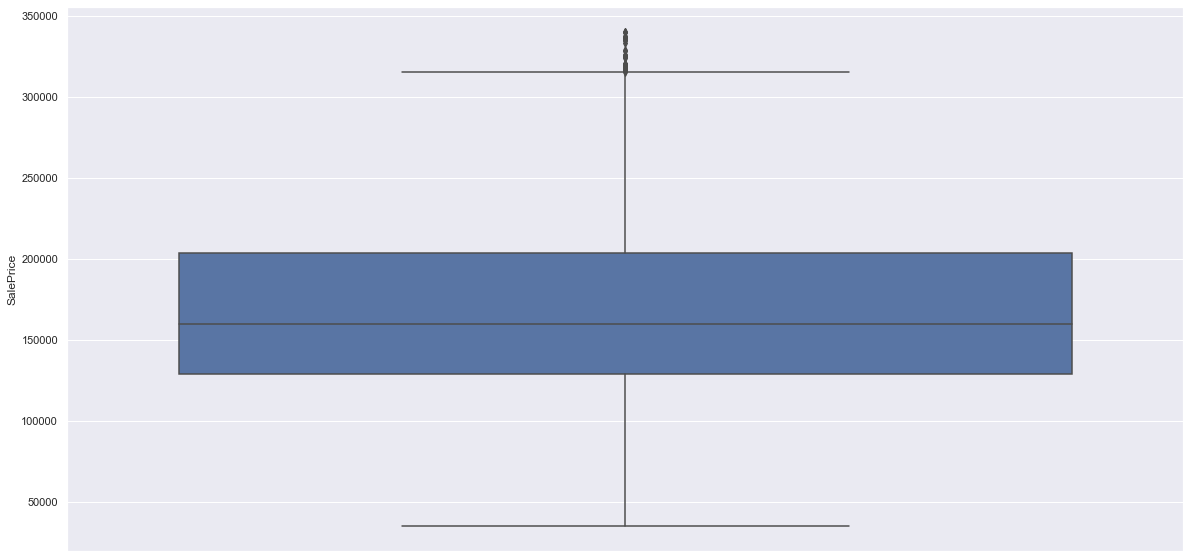

In [1013]:
#check distribution of saleprice
plt.figure(figsize=(20, 10))
sns.boxplot(y = 'SalePrice', data = raw_df)
plt.xticks(rotation='vertical')
plt.show()

In [1014]:
# remove outliers using Lot Area as the base
# using the IQR method
Q1 = raw_df["LotArea"].quantile(0.25)
Q3 = raw_df["LotArea"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
#remove outliers using this method
raw_df = raw_df[~((raw_df["LotArea"] < (Q1 - 1.5 * IQR)) |(raw_df["LotArea"] > (Q3 + 1.5 * IQR)))]

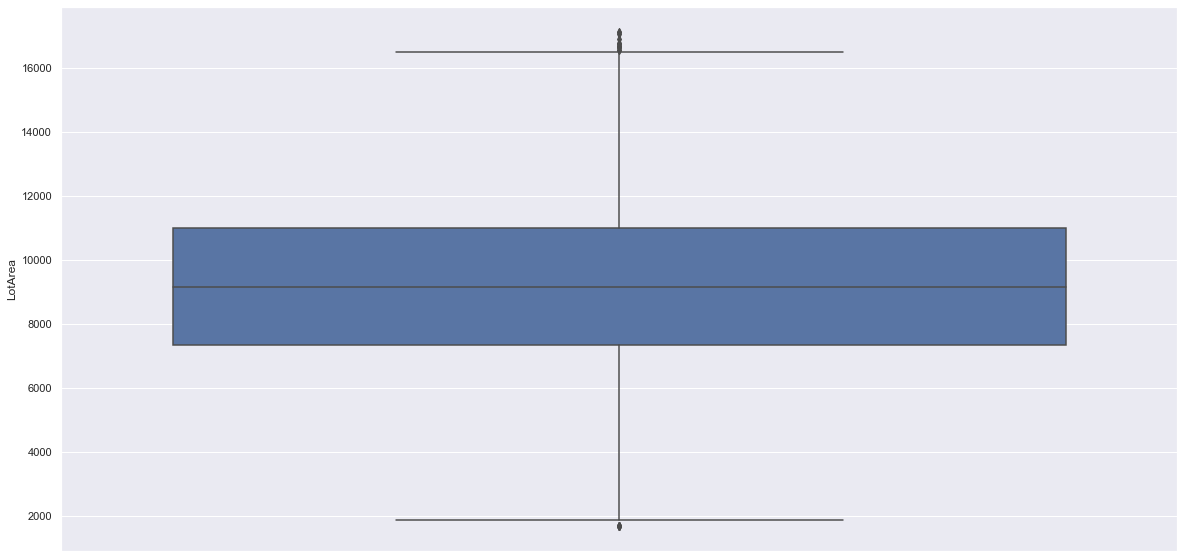

In [1015]:
#check distribution of Lot Area
plt.figure(figsize=(20, 10))
sns.boxplot(y = 'LotArea', data = raw_df)
plt.xticks(rotation='vertical')
plt.show()

In [1016]:
# drop columns found suspect in correlation analysis
raw_df.drop(['GarageCars', '1stFlrSF'],axis = 1, inplace=True)

### **Undertake Binning of Categorical Data**

In [1017]:
# there are some columns that have numerical data,
# however, the same is considered categorical in nature
cols = raw_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
raw_df[cols].nunique()

MSSubClass        15
LotFrontage       98
LotArea          946
OverallQual       10
OverallCond        9
YearBuilt        110
YearRemodAdd      61
MasVnrArea       289
BsmtFinSF1       575
BsmtFinSF2       132
BsmtUnfSF        726
TotalBsmtSF      648
2ndFlrSF         372
LowQualFinSF      21
GrLivArea        778
BsmtFullBath       4
BsmtHalfBath       3
FullBath           4
HalfBath           3
BedroomAbvGr       8
KitchenAbvGr       4
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       96
GarageArea       397
WoodDeckSF       245
OpenPorchSF      183
EnclosedPorch    112
3SsnPorch         15
ScreenPorch       69
PoolArea           4
MiscVal           19
MoSold            12
YrSold             5
SalePrice        591
dtype: int64

In [1018]:
# looking at data dictionary, select only numeric categorical columns
# caveat: numberical variables haviing standardised values have also been
# considered as categorical
categorical_num= ['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces']


In [1019]:
# bin all categorical variables which have object datatype
categorical_obj = [
    'MSZoning',
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageCond',
    'GarageQual',
    'PavedDrive',
    'PoolQC',
    'Fence',
    'MiscFeature',
    'SaleType',
    'SaleCondition'  
]

In [1020]:
# create a variable that holds all columns that are required to be binned
cols4bin = categorical_num + categorical_obj

In [1021]:
# https://stackoverflow.com/questions/24109779/running-get-dummies-on-several-dataframe-columns

binnned_df = pd.get_dummies(data=raw_df, drop_first=True,columns=cols4bin)

binnned_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Fireplaces_1,Fireplaces_2,Fireplaces_3,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,G

In [1022]:
binnned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1459
Columns: 294 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(22), uint8(269)
memory usage: 617.7 KB


### **Prepare data for model for Linear Regression - Recursive VIF**

In [1023]:
# splitting data
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(666)
s1_train, s1_test = train_test_split(binnned_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1024]:
# set up scaler
# using Standard Scaler since we have not undertaken outlier treatment
scaler = StandardScaler()
num_vars=s1_train.columns.tolist()
#num_vars.remove('SalePrice')
s1_train[num_vars] = scaler.fit_transform(s1_train[num_vars])

In [1025]:
s1_train.head(10)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Fireplaces_1,Fireplaces_2,Fireplaces_3,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,G

In [1026]:
y_train = s1_train.pop('SalePrice')
X_train = s1_train

In [1027]:
def RFE_analysis(X_df,y_df,num_features):
    lm = LinearRegression()
    lm.fit(X_df, y_df)
     #for starts limit the no of features selected to that gereated in recursive VIF
    rfe = RFE(lm, n_features_to_select=num_features)
    rfe = rfe.fit(X_df, y_df)
    list(zip(X_df.columns,rfe.support_,rfe.ranking_))
    support_col = X_df.columns[rfe.support_]
    unsuport_col=X_df.columns[~rfe.support_]
    return support_col,unsuport_col

In [1028]:
 #Obtain regression model coefficients from statsmodels 
 #Reference: https://gist.github.com/zhiyzuo/972b8b95e115c44d6805c929b7b4e2ca
def get_coef_table(lin_reg):
    ''' lin_reg is a fitted statsmodels regression model
    Return a dataframe containing coefficients, pvalues, and the confidence intervals
    '''
    err_series = lin_reg.params - lin_reg.conf_int()[0]
    coef_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                            'ci_err': err_series.values[1:],
                            'pvalue': lin_reg.pvalues.round(4).values[1:],
                            'varname': err_series.index.values[1:]
                           })
    return coef_df

In [1029]:
#create a function to undertake linear_regression and undertake analysis
def linear_regression(df_indices,df_Xtrain,df_ytrain):
    #undertake regression
    X_train_lm = df_Xtrain[df_indices]
    X_train_lm = sm.add_constant(X_train_lm)
    lr_results = sm.OLS(df_ytrain, X_train_lm).fit() #create model
    #calculate VIF
    vif = pd.DataFrame()
    vif['varname'] = X_train_lm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False) 
    vif=vif.set_index('varname')#change df index to varname
    #process lr summary results
    df_lr_sum=get_coef_table(lr_results)#This works better :-)!
    df_lr_sum.set_index('varname')#change df index to varname
    df_lr_sum = df_lr_sum.sort_values(by=['pvalue'], ascending=False)#sort the dataframe by p value and in descending order
    #to undertake holistic analysis look at VIF and P values
    lr_sum=df_lr_sum.merge(vif, on='varname', how='left')#join both dataframes 
    lr_sum=lr_sum.set_index('varname')
    return lr_results, vif, lr_sum

In [1030]:
def iterate_recursion(feature_index,Xtrain,ytrain):
    lr,vif,lr_summary =linear_regression(feature_index,Xtrain,ytrain)
    #print ("Length of index is {}\n\r".format(len(feature_index)))
    lr_summary.sort_values(by=['VIF'], ascending=False, inplace=True)#sort the dataframe by vif and in descending order
    ##testing recursive modelling to save time
    lr_summary=lr_summary.reset_index()
    print(lr_summary)
    top_feature=lr_summary.varname.iloc[0]
    feature_pvalue=lr_summary.pvalue.iloc[0]
    feature_vif=lr_summary.VIF.iloc[0]
    if (feature_vif>=4.99):
        #print("VIF of {} is {}(>4)".format(top_feature,feature_vif))
        #print("dropping feature {} and redoing regression..".format(top_feature))
        #drop feature from index
        feature_index=feature_index.drop(top_feature)
        #recurse regression
        lr,vif,lr_summary,feature_index=iterate_recursion(feature_index,Xtrain,ytrain)
    
    lr_summary.sort_values(by=['pvalue'], ascending=False, inplace=True)#sort the dataframe by vif and in descending order
    ##testing recursive modelling to save time
    top_feature=lr_summary.varname.iloc[0]
    feature_pvalue=lr_summary.pvalue.iloc[0]
    if (feature_pvalue>=0.05):
        #print("p value of {} is {}(>0.05)".format(top_feature,feature_pvalue))
        #print("dropping feature {} and redoing regression..".format(top_feature))
        #drop feature from index
        feature_index=feature_index.drop(top_feature)
        #recurse regression
        lr,vif,lr_summary,feature_index=iterate_recursion(feature_index,Xtrain,ytrain)
    print ("Final feature count is {}".format(len(feature_index)))
    return lr,vif,lr_summary,feature_index



In [1031]:
# uncomment the below block if you want to run afresh. Very time consuming
# iv=s1_train.columns
# regression_summary,VIF,feature_summary,feature_list =iterate_recursion(iv,X_train,y_train)
# print (VIF)

In [1034]:
# to prevent extra processing time, feature list drawn is being hardcoded here

feature_list=['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'LowQualFinSF',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MSSubClass_30',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_120', 'MSSubClass_160',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
       'BsmtFullBath_1', 'FullBath_1', 'FullBath_3', 'HalfBath_1',
       'BedroomAbvGr_4', 'BedroomAbvGr_8', 'Fireplaces_2', 'Fireplaces_3',
       'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SawyerW', 'Condition1_RRAe', 'Condition2_PosA',
        'BldgType_2fmCon', 'RoofMatl_WdShngl',
       'Exterior1st_BrkFace', 'Exterior1st_HdBoard', 'Exterior1st_Stone',
       'Exterior2nd_CmentBd', 'Exterior2nd_Wd Shng', 'ExterQual_Gd',
       'BsmtQual_Gd', 'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'BsmtExposure_None', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf',
       'Heating_OthW', 'KitchenQual_Gd', 'FireplaceQu_Gd', 'FireplaceQu_TA',
       'GarageFinish_Unf', 'GarageQual_Fa',  'PoolQC_Gd',
       'PoolQC_None', 'SaleType_New', 'SaleCondition_Normal']

In [1035]:
X_train_lm = X_train[feature_list]
X_train_lm = sm.add_constant(X_train_lm)
lr_final = sm.OLS(y_train, X_train_lm).fit()
y_train_cnt = lr_final.predict(X_train_lm)
lr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:58:49   Log-Likelihood:                -266.43
No. Observations:                 928   AIC:                             656.9
Df Residuals:                     866   BIC:                             956.5
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  8.99e-16      0.011   8.21e-14      1.000      -0.022       0.022
LotFrontage              0.0286      0.015      1.892      0.059      -0.001       0.058
LotArea                  0.1038      0.017      6.146      0.000       0.071       0.137
YearRemodAdd             0.0970      0.017      5.869      0.000       0.065       0.129
MasVnrArea               0.0499      0.013      3.811      0.000       0.024       0.076
LowQualFinSF            -0.0146      0.012     -1.224      0.221      -0.038       0.009
GarageArea               0.1299      0.016      8.380      0.000       0.099       0.160
WoodDeckSF               0.0399      0.012      3.216      0.001       0.016       0.064
OpenPorchSF              0.0401      0.012      3.301      0.001       0.016       0.064
MSSubClass_30           -0.0594      0.012     -4.823      0.000      -0.084      -0.035
MSSubClass_80           -0.0281      0.012     -2.349      0.019      -0.052      -0.005
MSSubClass_85           -0.0143      0.011     -1.240      0.215      -0.037       0.008
MSSubClass_120          -0.0080      0.014     -0.569      0.570      -0.035       0.020
MSSubClass_160          -0.0501      0.015     -3.338      0.001      -0.079      -0.021
OverallQual_6            0.0658      0.015      4.356      0.000       0.036       0.095
OverallQual_7            0.1793      0.019      9.359      0.000       0.142       0.217
OverallQual_8            0.2496      0.019     13.319      0.000       0.213       0.286
OverallQual_9            0.2139      0.013     16.172      0.000       0.188       0.240
OverallQual_10           0.0701      0.012      6.029      0.000       0.047       0.093
OverallCond_3           -0.0520      0.012     -4.488      0.000      -0.075      -0.029
OverallCond_4           -0.0394      0.012     -3.324      0.001      -0.063      -0.016
OverallCond_5           -0.0208      0.014     -1.478      0.140      -0.048       0.007
BsmtFullBath_1           0.0626      0.014      4.525      0.000       0.035       0.090
FullBath_1              -0.1227      0.017     -7.028      0.000      -0.157      -0.088
FullBath_3               0.0426      0.012      3.525      0.000       0.019       0.066
HalfBath_1               0.1049      0.014      7.642      0.000       0.078       0.132
BedroomAbvGr_4           0.0349      0.012      2.822      0.005       0.011       0.059
BedroomAbvGr_8           0.0458      0.012      3.797      0.000       0.022       0.069
Fireplaces_2             0.0066      0.012      0.539      0.590      -0.017       0.030
Fireplaces_3             0.0062      0.011      0.558      0.577      -0.016       0.028
Street_Pave              0.0269      0.011      2.421      0.016       0.005       0.049
LotConfig_CulDSac        0.0173      0.012      1.481    

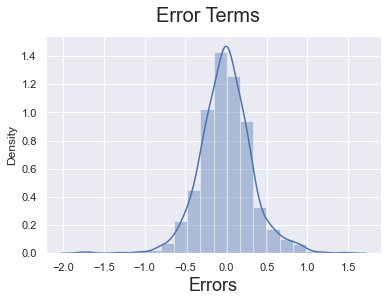

In [1036]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

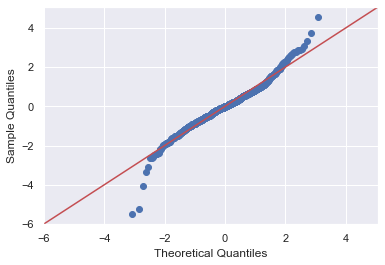

In [1037]:
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

In [1038]:
num_vars=s1_test.columns.tolist()
#num_vars.remove('SalePrice')
s1_test[num_vars] = scaler.transform(s1_test[num_vars])

In [1039]:
y_test = s1_test.pop('SalePrice')
X_test = s1_test

In [1040]:
X1_test = X_test[feature_list]
X1_test = sm.add_constant(X1_test,has_constant='add')

In [1041]:
X1_test.describe()

,const,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,MSSubClass_30,MSSubClass_80,MSSubClass_85,MSSubClass_120,MSSubClass_160,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,BsmtFullBath_1,FullBath_1,FullBath_3,HalfBath_1,BedroomAbvGr_4,BedroomAbvGr_8,Fireplaces_2,Fireplaces_3,Street_Pave,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Condition1_RRAe,Condition2_PosA,BldgType_2fmCon,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_Stone,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,ExterQual_Gd,BsmtQual_Gd,BsmtCond_Po,BsmtExposure_Gd,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_GLQ,BsmtFinType1_Unf,Heating_OthW,KitchenQual_Gd,FireplaceQu_Gd,FireplaceQu_TA,GarageFinish_Unf,GarageQual_Fa,PoolQC_Gd,PoolQC_None,SaleType_New,SaleCondition_Normal
count,398.0,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,3.980000e+02,398.000000,398.000000,398.000000,398.000000,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.0,0.028379,-0.018227,0.121627,-0.017757,-0.100817,0.083667,0.029622,0.119735,-0.079769,0.001688,0.099418,0.186214,0.047567,-0.004485,0.002191,0.105456,-0.055244,0.007707,-0.055865,-0.026520,0.101486,0.058722,-0.063939,0.054868,-0.124586,-0.044294,-0.032844,-0.015133,0.043737,-0.120319,0.107932,0.001898,0.028977,0.007309,0.079767,-0.012243,0.132334,0.002513,-0.056736,0.043737,0.137828,0.042567,-4.647394e-02,0.112944,-0.011204,0.090138,0.128495,-4.647394e-02,0.011677,-0.147947,0.019833,0.107347,-0.105322,-4.647394e-02,0.130346,0.016621,-0.020489,-0.002799,0.058721,0.002513,-0.120319,0.105616,-0.027214
std,0.0,1.071268,1.072948,0.951646,1.064802,0.412526,0.934425,0.903186,1.250185,0.829092,1.005225,1.375391,1.312815,1.102186,0.998898,1.002698,1.129156,0.767241,1.080901,0.787469,0.934229,0.987884,1.014487,0.995882,1.244947,0.959519,0.951904,0.000000,0.973070,1.527800,2.157913,1.204866,1.006270,1.154278,1.025060,1.188039,0.973995,1.666648,0.050125,0.801963,1.527800,1.344986,1.040656,6.947628e-18,1.285066,0.967861,1.031085,1.015985,6.947628e-18,1.022105,1.056530,1.057503,1.056045,0.953316,6.947628e-18,1.021652,1.011650,0.986669,1.000864,1.144720,0.050125,2.157913,1.179402,1.026073
min,1.0,-2.639268,-2.486141,-1.598173,-0.584308,-0.132120,-2.207331,-0.704757,-0.709953,-0.243641,-0.203780,-0.109525,-0.233550,-0.212238,-0.605571,-0.539149,-0.331735,-0.132453,-0.046474,-0.144576,-0.197974,-1.083191,-0.776378,-0.949547,-0.098961,-0.769264,-0.396368,-0.032844,-0.255816,-0.032844,-30.446675,-0.223100,-0.182777,-0.087180,-0.148413,-0.185902,-0.217725,-0.073601,0.000000,-0.155829,-0.032844,-0.162938,-0.425043,-4.647394e-02,-0.166390,-0.166390,-0.689462,-0.836441,-4.647394e-02,-0.258199,-1.557034,-0.166390,-0.577350,-0.682667,-4.647394e-02,-0.801547,-0.549129,-0.522472,-0.870388,-0.182777,0.000000,-30.446675,-0.248566,-2.304978
25%,1.0,-0.447830,-0.645191,-0.643395,-0.584308,-0.132120,-0.443860,-0.704757,-0.709953,-0.243641,-0.203780,-0.109525,-0.233550,-0.212238,-0.605571,-0.539149,-0.331735,-0.132453,-0.046474,-0.144576,-0.197974,-1.083191,-0.776378,-0.949547,-0.098961,-0.769264,-0.396368,-0.032844,-0.255816,-0.032844,0.032844,-0.223100,-0.182777,-0.087180,-0.148413,-0.185902,-0.217725,-0.073601,0.000000,-0.155829,-0.032844,-0.162938,-0.425043,-4.647394e-02,-0.166390,-0.166390,-0.689462,-0.836441,-4.6473

In [1042]:
len(X1_test.columns.tolist())

64

In [1043]:
len(lr_final.params.tolist())

64

In [1044]:
y_pred1 = lr_final.predict(X1_test)

In [1045]:
lr_final.params

const                   8.990204e-16
LotFrontage             2.858886e-02
LotArea                 1.038254e-01
YearRemodAdd            9.703097e-02
MasVnrArea              4.985964e-02
LowQualFinSF           -1.463061e-02
GarageArea              1.299168e-01
WoodDeckSF              3.987614e-02
OpenPorchSF             4.006595e-02
MSSubClass_30          -5.939940e-02
MSSubClass_80          -2.810299e-02
MSSubClass_85          -1.425379e-02
MSSubClass_120         -7.972738e-03
MSSubClass_160         -5.005134e-02
OverallQual_6           6.576542e-02
OverallQual_7           1.792975e-01
OverallQual_8           2.496399e-01
OverallQual_9           2.139405e-01
OverallQual_10          7.006132e-02
OverallCond_3          -5.199506e-02
OverallCond_4          -3.940232e-02
OverallCond_5          -2.080265e-02
BsmtFullBath_1          6.257149e-02
FullBath_1             -1.227217e-01
FullBath_3              4.255349e-02
HalfBath_1              1.048999e-01
BedroomAbvGr_4          3.486166e-02
B

Text(0, 0.5, 'y_pred1')

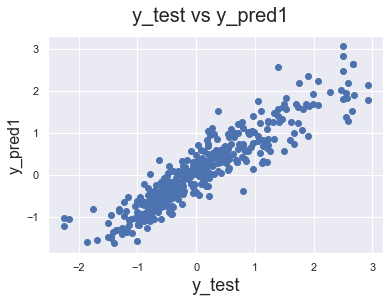

In [1046]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred1)
fig.suptitle('y_test vs y_pred1', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred1', fontsize = 16)     

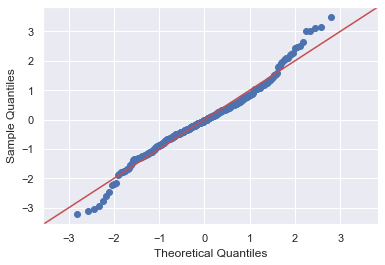

In [1047]:
sm.qqplot((y_test - y_pred1), fit=True, line='45')
plt.show()

Text(0.5, 0, 'Errors')

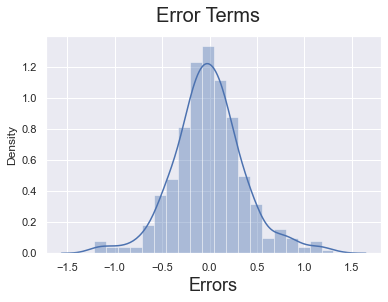

In [1048]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

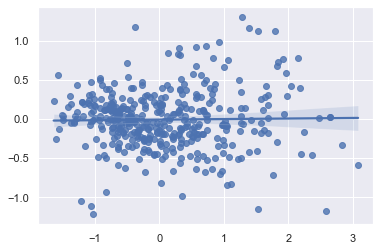

In [1049]:
sns.regplot(y_pred1,y_test-y_pred1,'r')
plt.show()

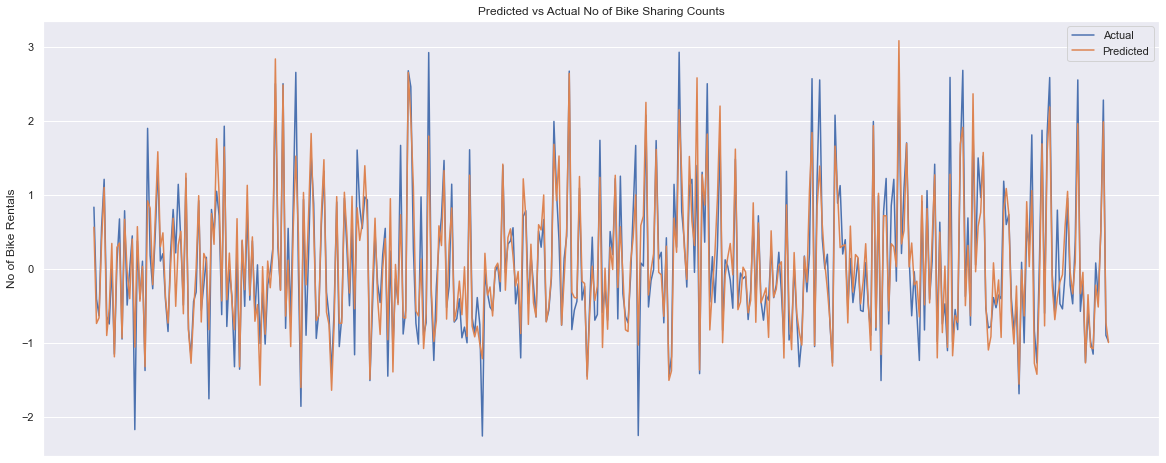

In [1050]:
# Plotting Actual vs Predicted
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred1)),y_pred1)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Bike Sharing Counts');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

In [1051]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse_train = mean_squared_error(y_train, y_train_cnt)
mae_train = mean_absolute_error(y_train, y_train_cnt)
mse_test = mean_squared_error(y_test, y_pred1)
mae_test = mean_absolute_error(y_test, y_pred1)
r2_test = r2_score(y_test, y_pred1)
r2_train = r2_score(y_train, y_train_cnt)
MAPE_test = np.mean(np.abs(y_pred1 - y_test) / (y_test + 1e-5))
MAPE_train = np.mean(np.abs(y_train_cnt - y_train) / (y_train + 1e-5))
print('R-squared for train data:',round(r2_train,2))
print('R-squared for test data:',round(r2_test,2))
print('Mean Squared Error for train data',round(mse_train,3))
print('Mean Absolute Error for train data',round(mae_train,3))
print('Mean Squared Error for test data',round(mse_test,3))
print('Mean Absolute Error for test data',round(mae_test,3))
print('Mean Absolute Percentage Error for test data',round(MAPE_test,3))
print('Mean Absolute Percentage Error for train data',round(MAPE_train,3))
print ('\nFinal Parameters for Model 1 based only on VIF analysis are :\n{}'.format(lr_final.params))

R-squared for train data: 0.9
R-squared for test data: 0.85
Mean Squared Error for train data 0.104
Mean Absolute Error for train data 0.237
Mean Squared Error for test data 0.141
Mean Absolute Error for test data 0.279
Mean Absolute Percentage Error for test data 1.036
Mean Absolute Percentage Error for train data -0.129

Final Parameters for Model 1 based only on VIF analysis are :
const                   8.990204e-16
LotFrontage             2.858886e-02
LotArea                 1.038254e-01
YearRemodAdd            9.703097e-02
MasVnrArea              4.985964e-02
LowQualFinSF           -1.463061e-02
GarageArea              1.299168e-01
WoodDeckSF              3.987614e-02
OpenPorchSF             4.006595e-02
MSSubClass_30          -5.939940e-02
MSSubClass_80          -2.810299e-02
MSSubClass_85          -1.425379e-02
MSSubClass_120         -7.972738e-03
MSSubClass_160         -5.005134e-02
OverallQual_6           6.576542e-02
OverallQual_7           1.792975e-01
OverallQual_8        

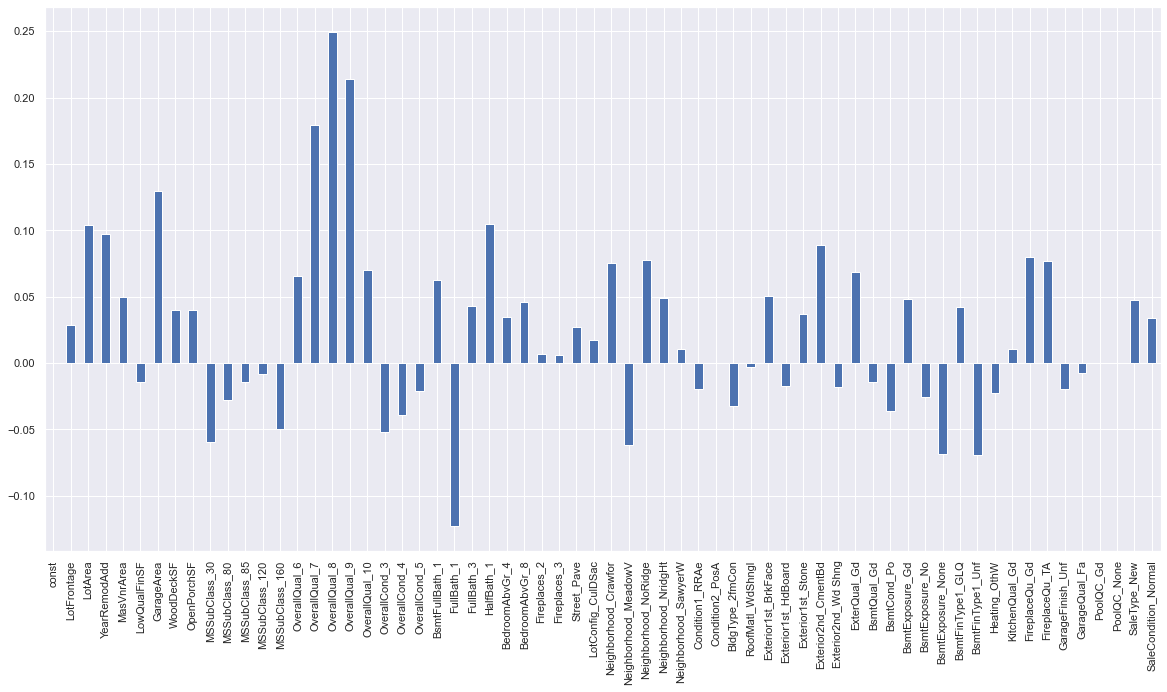

In [1052]:
# generate a bar plot of linear regression paramaters to see their influence
lr_final.params.plot.bar(figsize=(20,10))
plt.show()

### **Prepare data for model for Ridge Regression**

In [1053]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [1054]:
# splitting data
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(666)
s2_train, s2_test = train_test_split(binnned_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1055]:
# set up scaler
# using Standard Scaler since we have not undertaken outlier treatment
scaler = StandardScaler()
num_vars=s2_train.columns.tolist()
#num_vars.remove('SalePrice')
s2_train[num_vars] = scaler.fit_transform(s2_train[num_vars])

In [1056]:
y_train = s2_train.pop('SalePrice')
X_train = s2_train

In [1057]:
# prepare list of lambda coefficients to use

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [1058]:
ridge = Ridge()

In [1059]:
# cross validation
folds = 50
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 50 folds for each of 28 candidates, totalling 1400 fits


GridSearchCV(cv=50, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1060]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [1061]:
# Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)
print(ridge.feature_names_in_)

['LotFrontage' 'LotArea' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea'
 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'TotRmsAbvGrd' 'GarageYrBlt' 'GarageArea'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'MiscVal' 'MoSold' 'YrSold' 'MSSubClass_30' 'MSSubClass_40'
 'MSSubClass_45' 'MSSubClass_50' 'MSSubClass_60' 'MSSubClass_70'
 'MSSubClass_75' 'MSSubClass_80' 'MSSubClass_85' 'MSSubClass_90'
 'MSSubClass_120' 'MSSubClass_160' 'MSSubClass_180' 'MSSubClass_190'
 'OverallQual_2' 'OverallQual_3' 'OverallQual_4' 'OverallQual_5'
 'OverallQual_6' 'OverallQual_7' 'OverallQual_8' 'OverallQual_9'
 'OverallQual_10' 'OverallCond_2' 'OverallCond_3' 'OverallCond_4'
 'OverallCond_5' 'OverallCond_6' 'OverallCond_7' 'OverallCond_8'
 'OverallCond_9' 'BsmtFullBath_1' 'BsmtFullBath_2' 'BsmtFullBath_3'
 'BsmtHalfBath_1' 'BsmtHalfBath_2' 'FullBath_1' 'FullBath_2' 'FullBath_3'
 'HalfBath_1' 'HalfBath_2' 'BedroomAbvGr_1' 'BedroomAbvGr

In [1062]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9502065458334339
0.8923590345863771
46.2083254665734
41.63565568794136
0.049793454166566165
0.10461220022095818


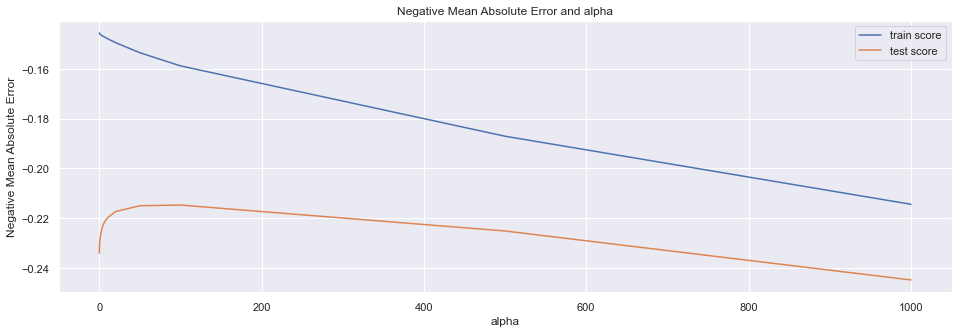

In [1063]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### **Prepare data for model for Lasso Regression**

In [1064]:
# splitting data
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(666)
s3_train, s3_test = train_test_split(binnned_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1065]:
# set up scaler
# using Standard Scaler since we have not undertaken outlier treatment
scaler = StandardScaler()
num_vars=s3_train.columns.tolist()
#num_vars.remove('SalePrice')
s3_train[num_vars] = scaler.fit_transform(s3_train[num_vars])

In [1066]:
y_train = s3_train.pop('SalePrice')
X_train = s3_train

In [1067]:
# prepare list of lambda coefficients to use

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [1068]:
lasso = Lasso()

In [1069]:
# cross validation
folds = 50
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 50 folds for each of 28 candidates, totalling 1400 fits


GridSearchCV(cv=50, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1070]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [1071]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [1073]:
print(lasso.feature_names_in_)
print(len(lasso.feature_names_in_))

['LotFrontage' 'LotArea' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea'
 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'TotRmsAbvGrd' 'GarageYrBlt' 'GarageArea'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'MiscVal' 'MoSold' 'YrSold' 'MSSubClass_30' 'MSSubClass_40'
 'MSSubClass_45' 'MSSubClass_50' 'MSSubClass_60' 'MSSubClass_70'
 'MSSubClass_75' 'MSSubClass_80' 'MSSubClass_85' 'MSSubClass_90'
 'MSSubClass_120' 'MSSubClass_160' 'MSSubClass_180' 'MSSubClass_190'
 'OverallQual_2' 'OverallQual_3' 'OverallQual_4' 'OverallQual_5'
 'OverallQual_6' 'OverallQual_7' 'OverallQual_8' 'OverallQual_9'
 'OverallQual_10' 'OverallCond_2' 'OverallCond_3' 'OverallCond_4'
 'OverallCond_5' 'OverallCond_6' 'OverallCond_7' 'OverallCond_8'
 'OverallCond_9' 'BsmtFullBath_1' 'BsmtFullBath_2' 'BsmtFullBath_3'
 'BsmtHalfBath_1' 'BsmtHalfBath_2' 'FullBath_1' 'FullBath_2' 'FullBath_3'
 'HalfBath_1' 'HalfBath_2' 'BedroomAbvGr_1' 'BedroomAbvGr

In [1074]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9397012635339457
0.9035372420046547
55.957227440498414
37.31191153080381
0.060298736466054326
0.09374852143418043


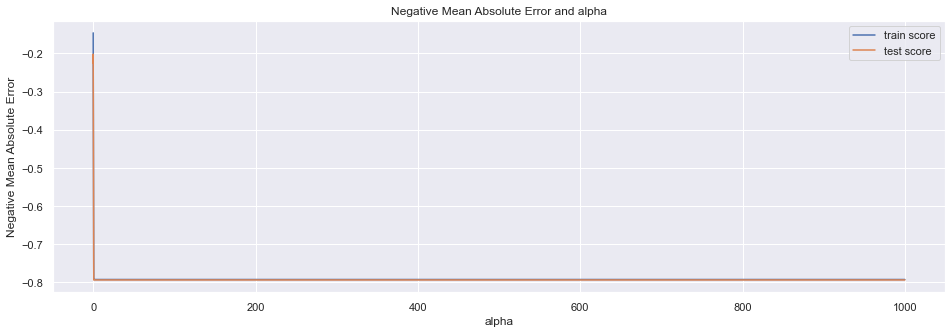

In [1075]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()